In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split 


from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_csv_path = "/content/drive/MyDrive/college mini project/heart.csv"
myData = pd.read_csv(heart_csv_path)

In [ ]:
myData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
myData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
myData.shape

(1025, 14)

In [ ]:
myData.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
myData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

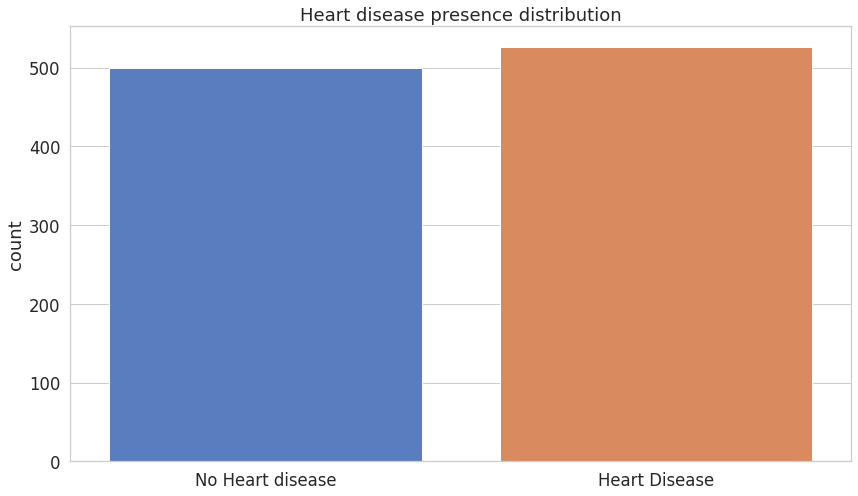

In [ ]:
#data visualization
f = sns.countplot(x='target', data=myData)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

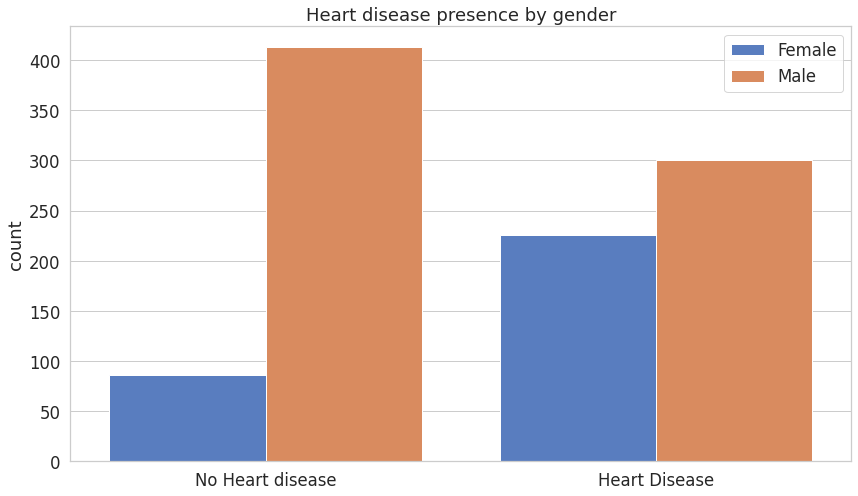

In [ ]:
f = sns.countplot(x='target', data=myData, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

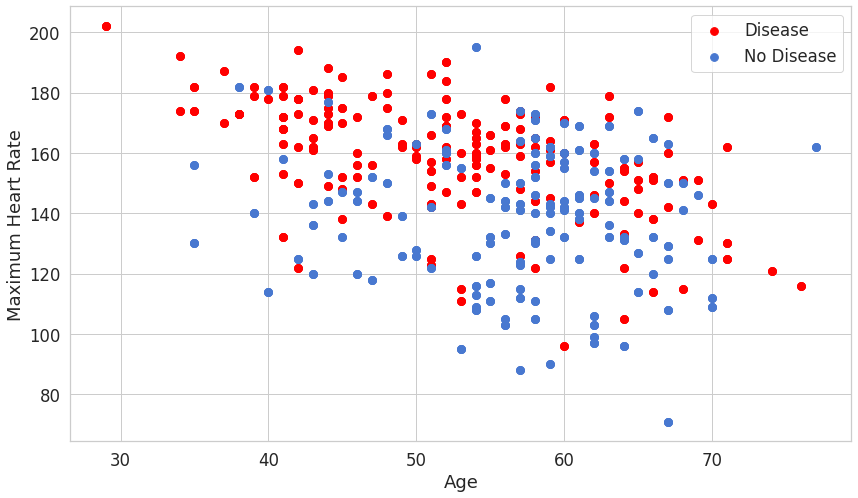

In [ ]:
#scatter plotting
plt.scatter(x=myData.age[myData.target==1], y=myData.thalach[(myData.target==1)], c="red", s=60)
plt.scatter(x=myData.age[myData.target==0], y=myData.thalach[(myData.target==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

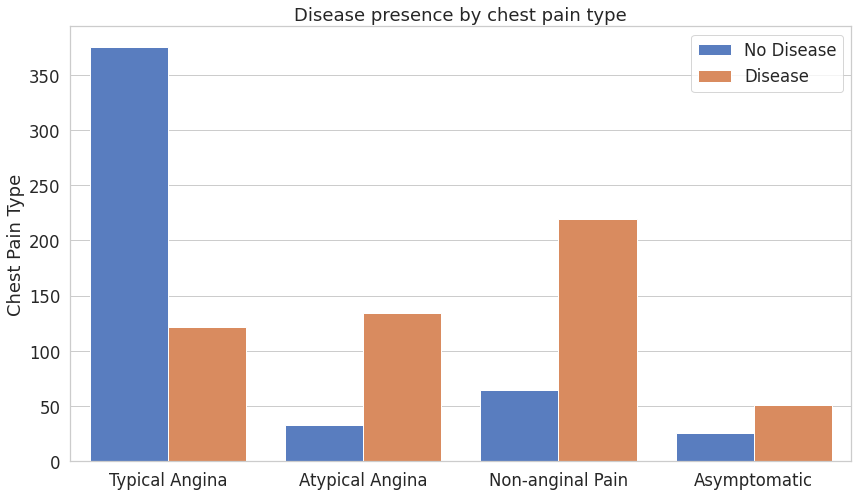

In [ ]:
f = sns.countplot(x='cp', data=myData, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Disease presence by chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

------------------------------------------------------------------------------------

In [ ]:
import warnings
warnings.filterwarnings('ignore') #controls whether warnings are ignored, displayed, or turned into errors (raising an exception).

In [ ]:
myData.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0


In [ ]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
myData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---------------------------

In [ ]:
import scipy.stats as stats
import pylab

color='#e1679c'

def colDistri(data,var):
    print('\n'+textColor.BOLD+textColor.UNDERLINE+ 'Skewness : '+str(data[var].skew(axis = 0, skipna = True))+'\n')
    fig=plt.figure(figsize=(12,9))
    
    fig.suptitle('\"'+var+'\" '+'Column Distribution', fontweight='bold', fontsize=16)
    

    ax_1=fig.add_subplot(1, 2, 1)
    plt.title('Box Plot', fontweight='bold', fontsize=14)
    sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=2,color=color)
    plt.ylabel(var, fontsize=11)
    
    ax_2=fig.add_subplot(2, 2, 2)
    plt.title('Histogram Plot', fontweight='bold', fontsize=14)
    sns.histplot(data=data, x=var, kde=True,color=color)
    plt.xlabel(var, fontsize=11)
    plt.ylabel('Count', fontsize=11)

    ax_3=fig.add_subplot(2, 2, 4)
    plt.title('Q-Q Plot', fontweight='bold', fontsize=14)
    stats.probplot(data[var], dist="norm", plot=pylab)
    ax_3.get_lines()[0].set_markerfacecolor(color)
    plt.xlabel('Theoritical Quantiles', fontsize=11)
    plt.ylabel('Sample Quantiles', fontsize=11)
    plt.show()
    print()

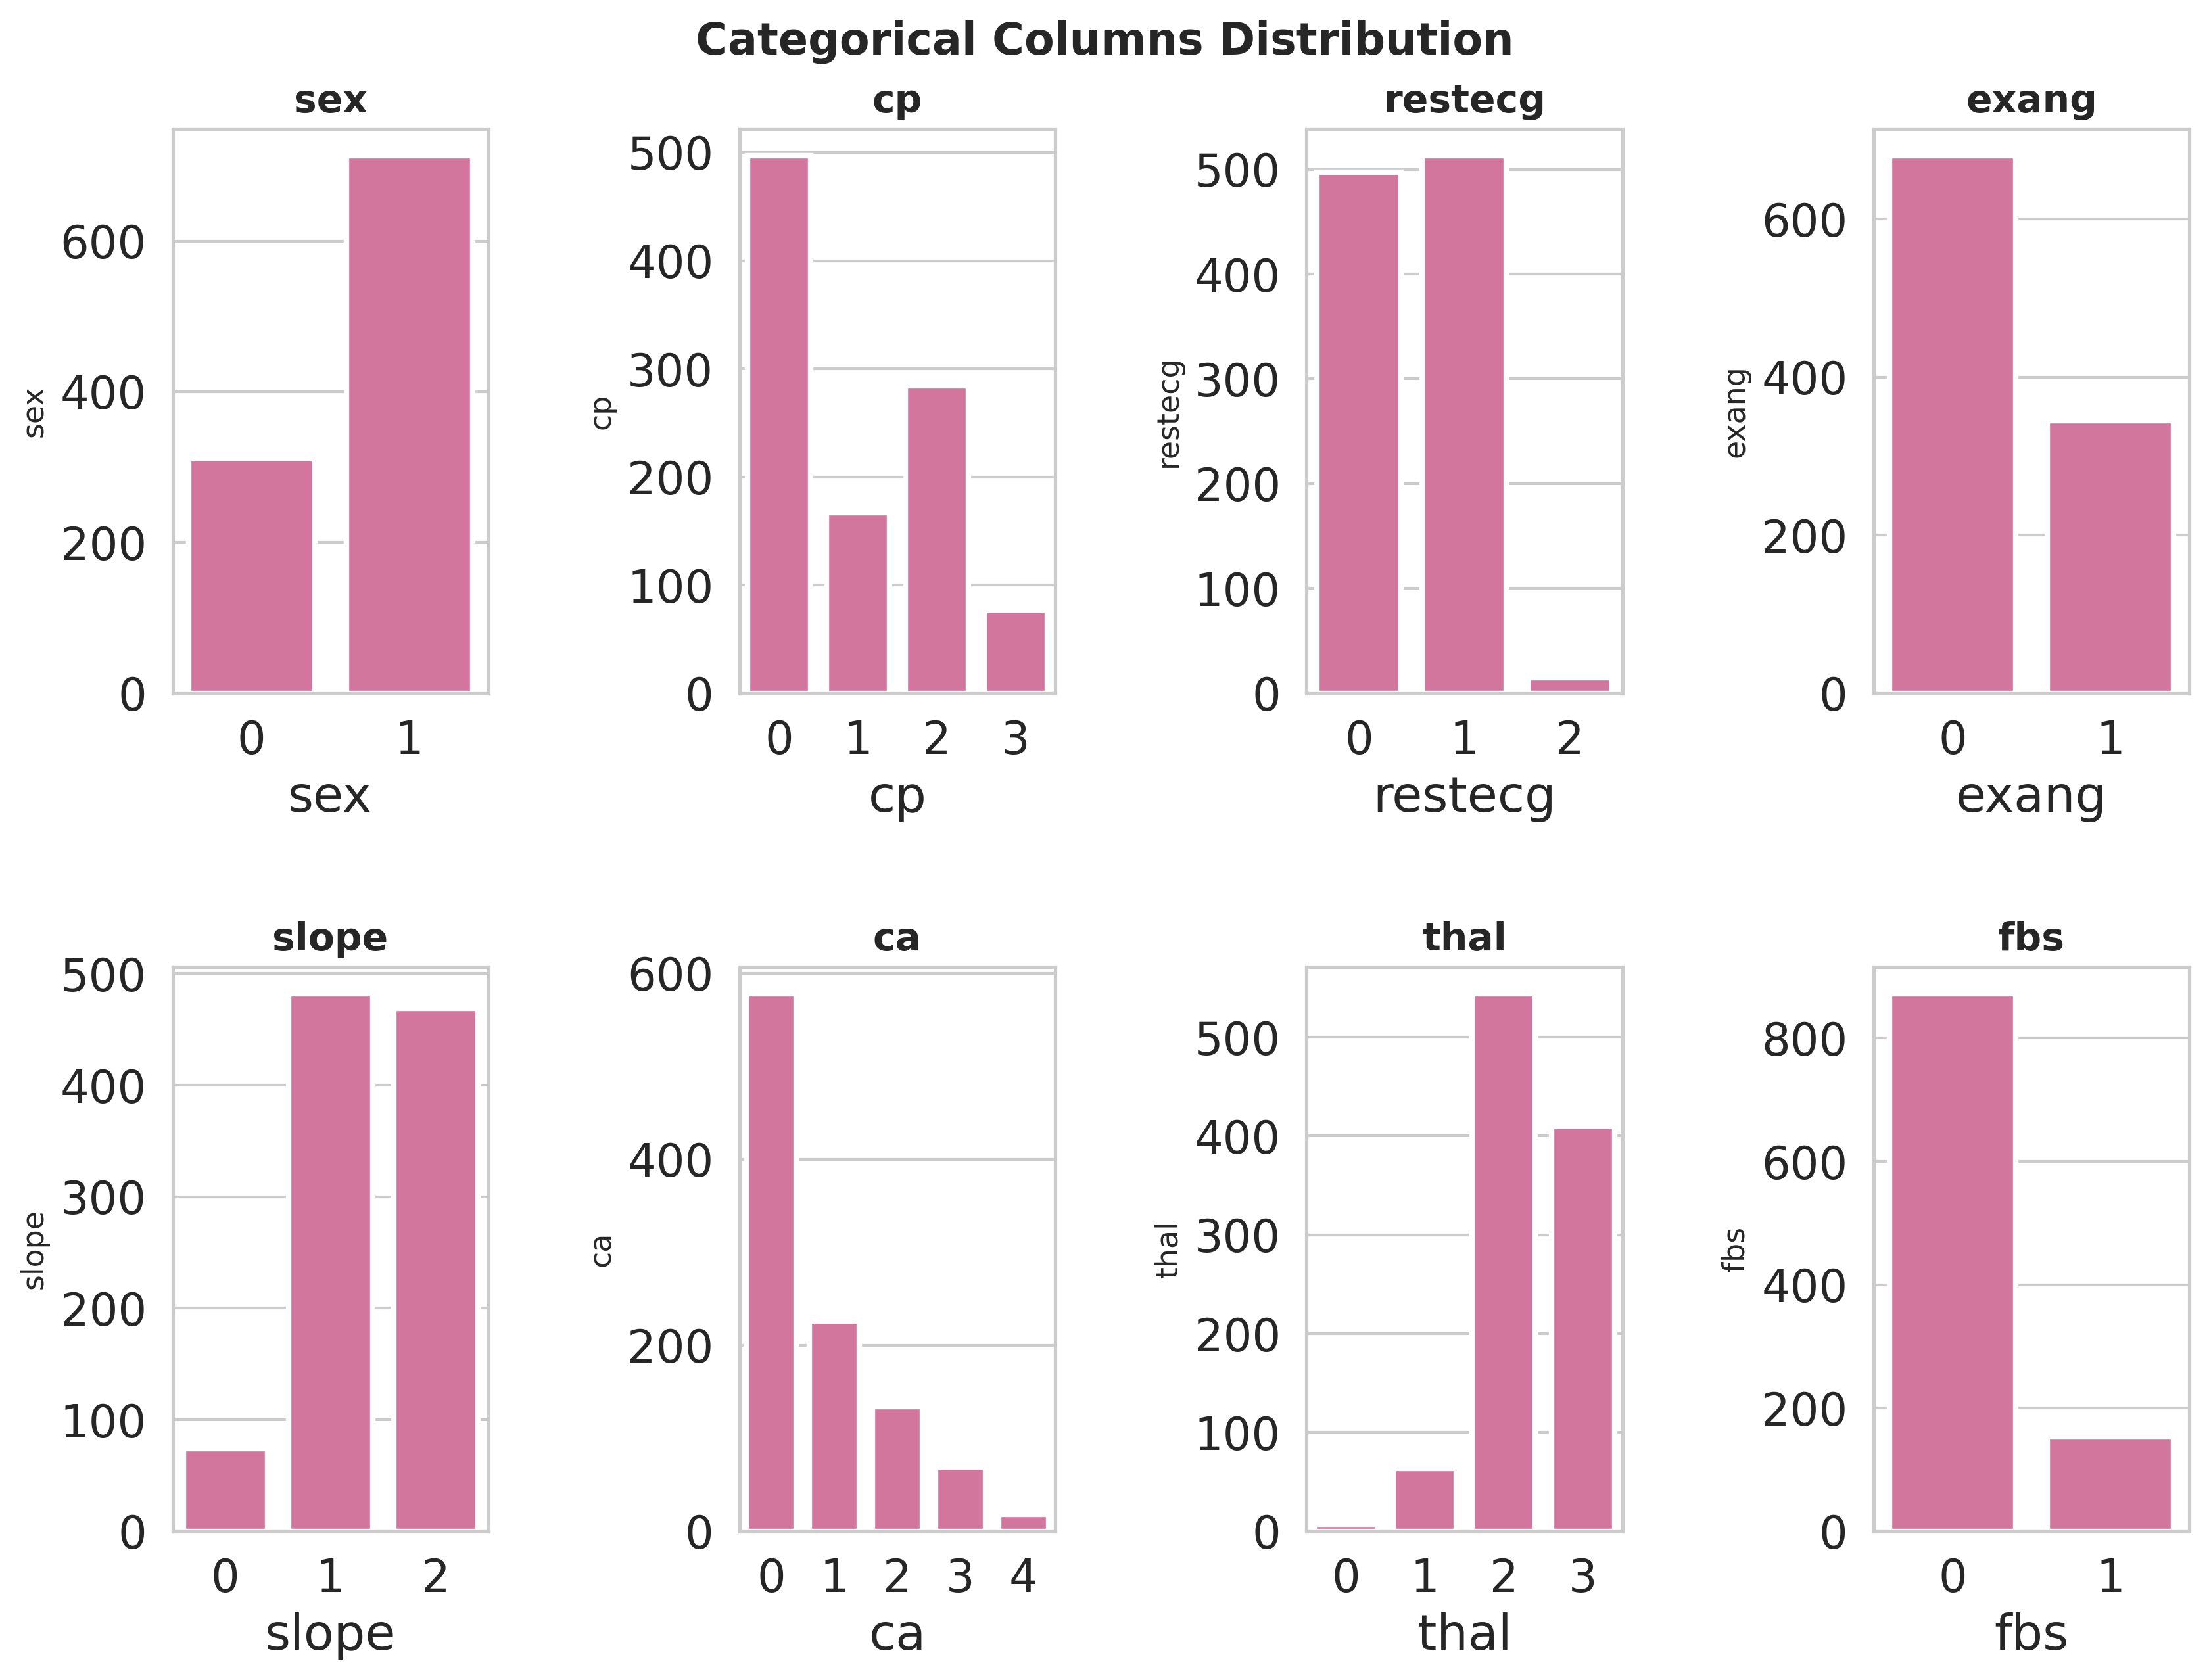

In [ ]:
cols=['sex','cp','restecg','exang','slope','ca','thal','fbs']

fig=plt.figure(figsize=(12,9),dpi=300)

fig.suptitle('Categorical Columns Distribution', fontweight='bold', fontsize=16)

x=1

for i in range(len(cols)):
    fig.add_subplot(2, 4, i+1)
    plt.title(cols[i], fontweight='bold', fontsize=14)
    sns.countplot(data=myData, x=cols[i], linewidth=2,color=color)
    plt.ylabel(cols[i], fontsize=11)
    
fig.tight_layout(pad=2.0)


In [ ]:
import pandas_profiling as pp
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.cm import rainbow
%matplotlib inline

In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "histogram"}, {"type": "pie"}]])
fig.add_trace(
    go.Histogram(
             x=myData['age'].where(myData['sex']==1),
             nbinsx=20,showlegend=False
             ),
    row=1,col=1
)
fig.add_trace(
     go.Histogram(
             x=myData['age'].where(myData['sex']==0),
             nbinsx=20,showlegend=False
             ),
    row=1,col=1
)

fig.add_trace(
    go.Pie(
    labels=['Male','Female'],
    values=myData.sex.value_counts(),
    ),
    row=1,col=2
)

fig.update_layout(height=500, 
                  title_text="Age & Gender Distribution",
                  xaxis_title_text='Age',
                  yaxis_title_text='Count',
                  bargap=0.05,
                  template='plotly_dark',
                 )

fig.show()

In [ ]:
cp=myData.groupby(by=["cp"]).size().reset_index(name="Count")
for i in cp['cp']:
    cp['cp'][i]='Type'+' '+str(i+1)

In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "histogram"}, {"type": "pie"}]])
fig.add_trace(
    go.Bar(
             x=cp['cp'],y=cp.Count,showlegend=False,marker={"color": 'white'}
             ),
    row=1,col=1
)
fig.update_layout(height=500, 
                  title_text="Chest Pain Type",
                  xaxis_title_text='Chest Pain Type',
                  yaxis_title_text='Count',
                  bargap=0.05,
                  template='plotly_dark',
                  
                 )
fig.add_trace(
    go.Pie(
    labels=cp.cp,
    values=cp.Count),
    row=1,col=2
)
fig.show()

In [ ]:
px.imshow(myData.corr(),height=800,width=800,color_continuous_scale=px.colors.sequential.matter_r,template='plotly_dark')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=pd.get_dummies(myData,columns=['sex','cp','restecg','exang','slope','ca','thal','fbs'])
scaler=StandardScaler()
scaledColumns=['age','trestbps','thalach','oldpeak','chol']
data[scaledColumns]=scaler.fit_transform(data[scaledColumns])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
x = data.drop(columns='target',axis=1)
y = data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=4)
print(x_train.shape,x_test.shape)

(768, 30) (257, 30)


In [ ]:
#LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
score=accuracy_score(y_train,train_pred)

lrScore=cross_val_score(model,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",lrScore,'\n')


10-Fold CV Score :  85.94422234913382 



In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knnScores=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    score=cross_val_score(knn,x,y,cv=12)
    knnScores.append(score.mean())

Text(0.5, 1.0, 'Scores for different K values')

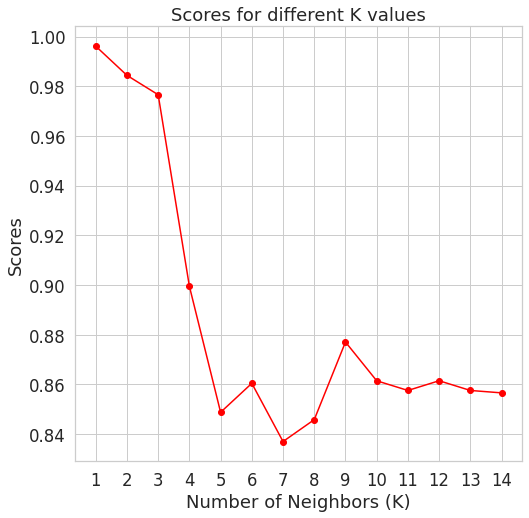

In [ ]:
plt.figure(figsize=(8,8))
plt.plot([k for k in range(1, 15)], knnScores, color = 'red',marker='o')
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('Scores for different K values')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knn.fit(x_train,y_train)
train_pred=knn.predict(x_train)
score=accuracy_score(y_train,train_pred)

knnScore=cross_val_score(knn,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",knnScore,'\n')


10-Fold CV Score :  99.41176470588235 



In [ ]:
#svc
from sklearn.svm import SVC

svmGrid = {'C': [1,2,4],
            'kernel': ['rbf','linear', 'poly', 'sigmoid'],
            'degree': [2,3,4,5,6,7,8,9,10]
           }


svm = SVC(max_iter=-1)
# svm.fit(x_train, y_train)
svcGscv = GridSearchCV(svm,param_grid=svmGrid,cv=5,n_jobs=-1)

svcGscv.fit(x_train,y_train)
svc_tuned_score = svcGscv.score(x_test, y_test)
svc_tuned_score

1.0

In [ ]:
svcGscv.best_params_

{'C': 4, 'degree': 8, 'kernel': 'poly'}

In [ ]:
svm = SVC(C=4, degree=8, kernel='poly',max_iter=1000)
svm.fit(x_train,y_train)

train_pred=svm.predict(x_train)
score=accuracy_score(y_train,train_pred)

svmScore=cross_val_score(svm,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",svmScore,'\n')


10-Fold CV Score :  99.41462021701885 



In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
train_pred=nb.predict(x_train)
score=accuracy_score(y_train,train_pred)

nbScore=cross_val_score(nb,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",nbScore,'\n')


10-Fold CV Score :  83.9967637540453 



In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 12)
dt.fit(x_train,y_train)
train_pred=dt.predict(x_train)
score=accuracy_score(y_train,train_pred)

dtScore=cross_val_score(dt,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",dtScore,'\n')


10-Fold CV Score :  99.70588235294117 



In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
randFor = RandomForestClassifier(n_estimators=1000, random_state = 35)
randFor.fit(x_train, y_train)
train_pred=randFor.predict(x_train)
score=accuracy_score(y_train,train_pred)

randForScore=cross_val_score(randFor,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",randForScore,'\n')


10-Fold CV Score :  99.70588235294117 



In [ ]:
#camparision
compare = pd.DataFrame({
    'Model':['Logistic Regression','K Nearest Neighbor', 'SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest Classifier'],
    'Accuracy':[lrScore,knnScore,svmScore,nbScore,dtScore,randForScore]
})
compare.sort_values(['Accuracy'],ascending=False)

,Model,Accuracy
4,Decision Tree,99.705882
5,Random Forest Classifier,99.705882
2,SVC,99.414620
1,K Nearest Neighbor,99.411765
0,Logistic Regression,85.944222
3,Naive Bayes,83.996764


## ANN

In [ ]:
# data normalization
myData = (myData - np.min(myData))/(np.max(myData) - np.min(myData))
myData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [ ]:
#split the data to tain test 
x = myData.drop('target', axis=1)
y = myData['target']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=2)

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(13,),activation="relu"))
model.add(Dense(units=64, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(units=128, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,313
Trainable params: 16,313
Non-traina

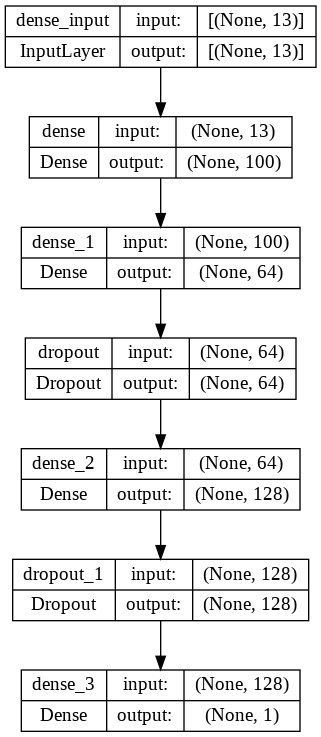

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="Heart Disease Prediction.png",show_shapes=True)

In [ ]:
hist=model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=100) 

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 0.9447 - accuracy: 0.6293 - val_loss: 0.9093 - val_accuracy: 0.7366
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.7913 - accuracy: 0.7866 - val_loss: 0.7347 - val_accuracy: 0.8244
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.8207 - val_loss: 0.7171 - val_accuracy: 0.8195
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.8317 - val_loss: 0.6875 - val_accuracy: 0.8293
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.8329 - val_loss: 0.6855 - val_accuracy: 0.8439
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.8500 - val_loss: 0.6805 - val_accuracy: 0.8537
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.8622 - val_loss: 0.6682 - val_accuracy: 0.8585
Epoch 8/100


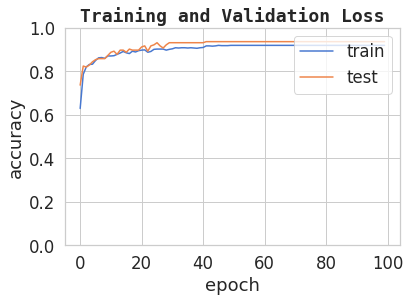

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Loss',size=18,fontweight='bold',fontname='monospace')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper right');

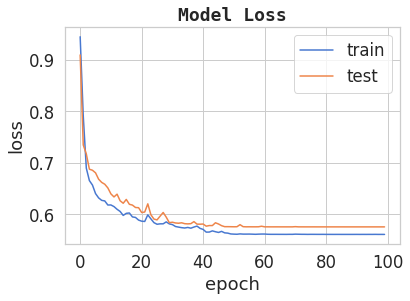

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss',size=18,fontweight='bold',fontname='monospace')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
y_predicted = (model.predict(X_test) >= 0.5)

7/7 [==============================] - 0s 2ms/step


In [ ]:
import tensorflow as tf
print(classification_report(Y_test.values, y_predicted))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       105
         1.0       0.91      0.96      0.94       100

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [ ]:
conf_mat = confusion_matrix(Y_test, y_predicted)
print(conf_mat)
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)

[[96  9]
 [ 4 96]]
specificity :  0.9142857142857143
sensitivity :  0.96
accuracy :  0.9365853658536586


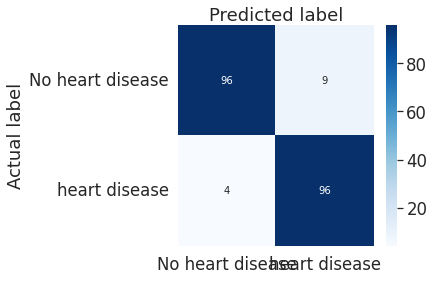

In [ ]:
class_names = ["No heart disease","heart disease"]

fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names, )
sns.heatmap(df_cm,annot=True,cmap="Blues",fmt="d")
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## CNN

In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Seperating features from the dataset
X = myData.iloc[:,:-1].values
X

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [ ]:
# Seperating targets from the dataset
Y = myData.iloc[:,-1].values
Y

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
# Scaling the feature values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Seperating training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

In [ ]:
# Checking one row scaled feature from training set
X_train.shape

(922, 13)

In [ ]:
scaled_xtrain3d = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
scaled_xtest3d = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((922, 13, 1), (103, 13, 1))

In [ ]:

model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=scaled_xtrain3d[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((2)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 flatten (Flatten)           (None, 128)              

In [ ]:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

a = model_cnn.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
26/26 [==============================] - 1s 15ms/step - loss: 0.5955 - accuracy: 0.7021 - val_loss: 0.4723 - val_accuracy: 0.7419
Epoch 2/50
26/26 [==============================] - 0s 8ms/step - loss: 0.4544 - accuracy: 0.7889 - val_loss: 0.4235 - val_accuracy: 0.7957
Epoch 3/50
26/26 [==============================] - 0s 7ms/step - loss: 0.3985 - accuracy: 0.8311 - val_loss: 0.4262 - val_accuracy: 0.8172
Epoch 4/50
26/26 [==============================] - 0s 7ms/step - loss: 0.3642 - accuracy: 0.8504 - val_loss: 0.4117 - val_accuracy: 0.8387
Epoch 5/50
26/26 [==============================] - 0s 7ms/step - loss: 0.3139 - accuracy: 0.8806 - val_loss: 0.3634 - val_accuracy: 0.8602
Epoch 6/50
26/26 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.8963 - val_loss: 0.3337 - val_accuracy: 0.8710
Epoch 7/50
26/26 [==============================] - 0s 6ms/step - loss: 0.2397 - accuracy: 0.9156 - val_loss: 0.3436 - val_accuracy: 0.8602
Epoch 8/50
26/26 [=

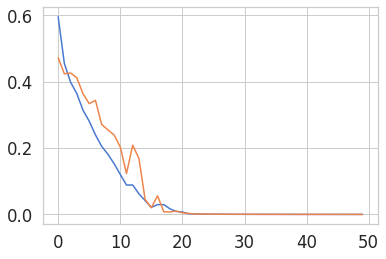

In [ ]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])

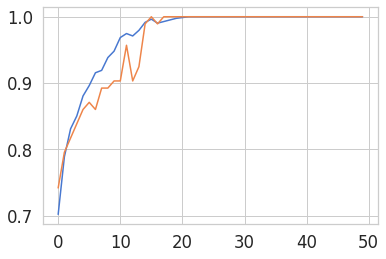

In [ ]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])

In [ ]:
y_predicted = model_cnn.predict(scaled_xtest3d)
y_predicted3 = y_predicted>0.5
# print(np.concatenate((y_predicted.reshape(len(y_predicted),1),y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 4ms/step


Text(4.5, 0.5, 'Actual')

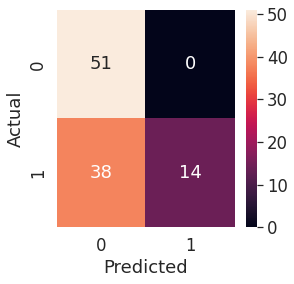

In [ ]:
# Building confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(tf.math.confusion_matrix(y_test, y_predicted), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Checking accuracy rate
import sklearn as skt
skt.metrics.accuracy_score(y_test, y_predicted3)*100

100.0